In [1]:
cd ..

/Users/igor.velikorechanin/Desktop/Masters/Thesis/GitHub PINN 4/trapezoidal_LF_model


/Users/igor.velikorechanin/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import torch
import numpy as np
from utils.benchmark_utils import run_model_comparison
from utils.plot_utils import plot_model_comparison, plot_efficiency_analysis

In [3]:
torch.manual_seed(42)
np.random.seed(42)

## Heat Equation


MODEL COMPARISON: Heat Equation
Runs: 5
LF-PINN: pretrain=200ep, finetune=1100ep
Correction modes: ['per_step_bias', 'per_step_gate']
Classical: 1000000ep, hidden_dims=[2, 4, 6]
Data: 50 points, noise=0.05


RUN 1/5 (seed=42)

  Training: LF-PINN (no data)...

Low-Fidelity PINN (Fixed-Point + Adaptive Steps)
PDE: heat | Max Steps: 4 | Params: 13
Iterations: 2 | LR: 0.005
Initial theta: 0.4

    ✓ L2RE=1.2755e-02, Time=32.4s

  Training: LF-PINN (per_step_bias)...

LF-PINN Theta Params
PDE: heat | Mode: per_step_bias
Steps: 4 | Iterations: 2
Base theta_net params: 13
Correction params: 4
Total trainable: 17

    Stage 1: PDE pretraining...
[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
    Pretrain done: 200 epochs, 33.2s
    Stage 2: Data finetuning (mode=per_step_bias)...
[ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
    Finetune done: 1100 epochs, 30.4s
    ✓ L2RE=6.9158

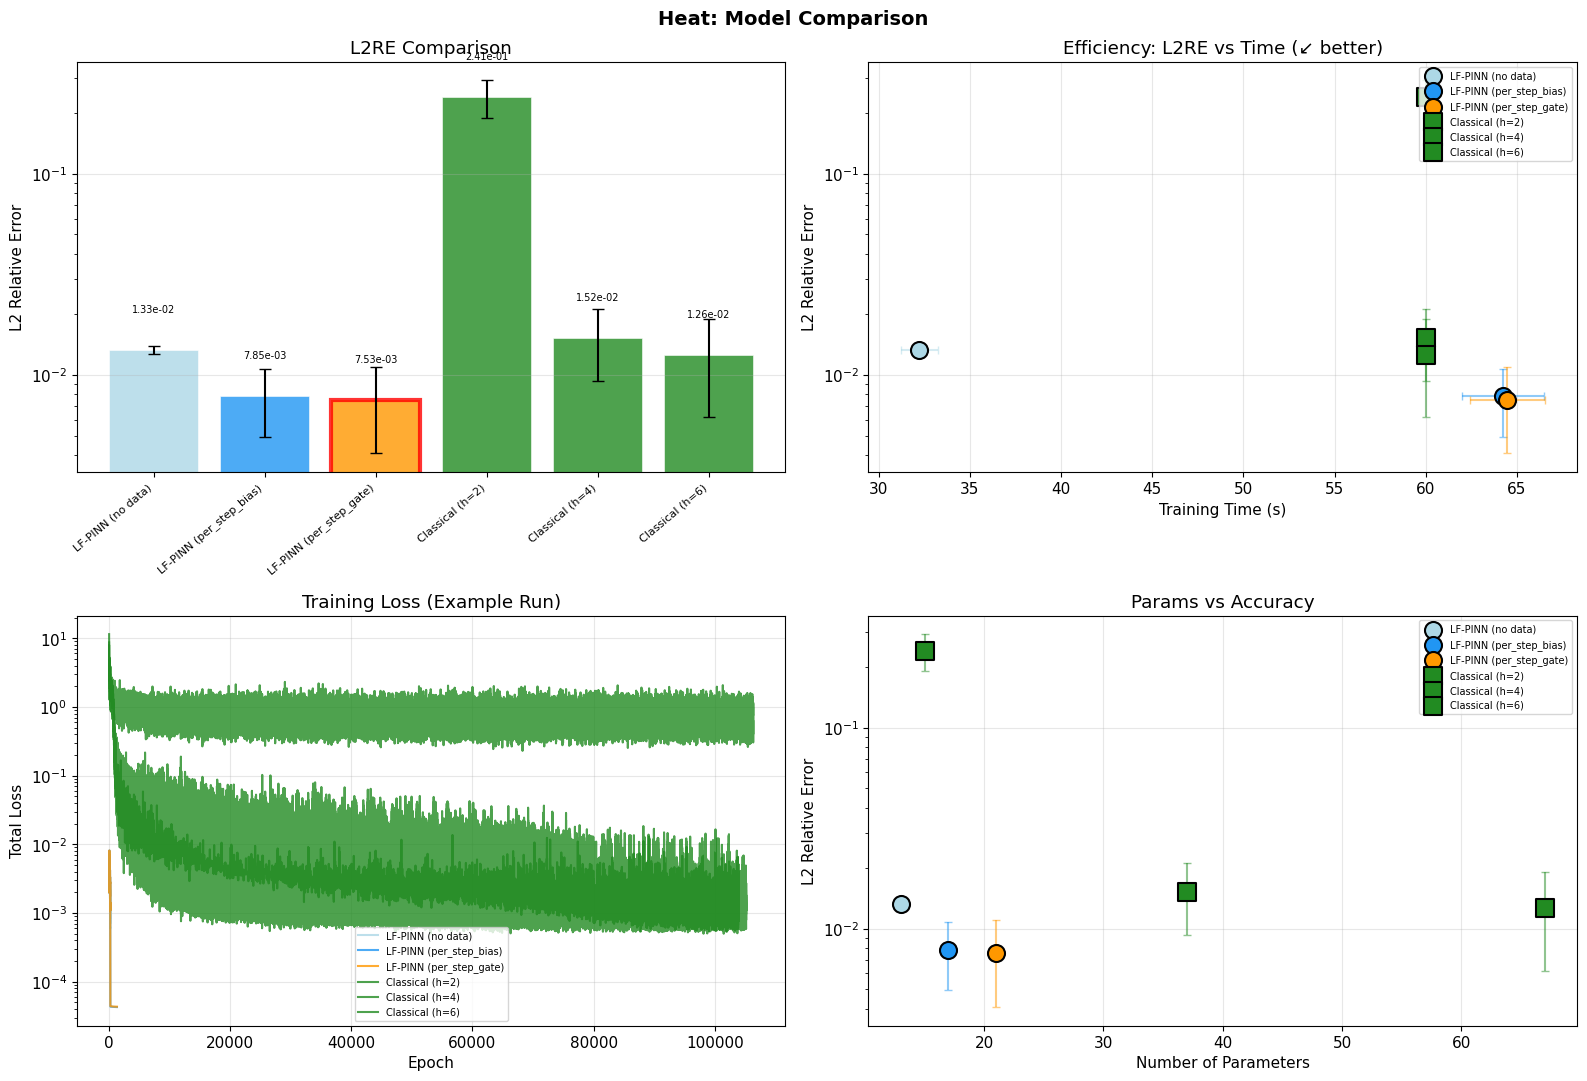

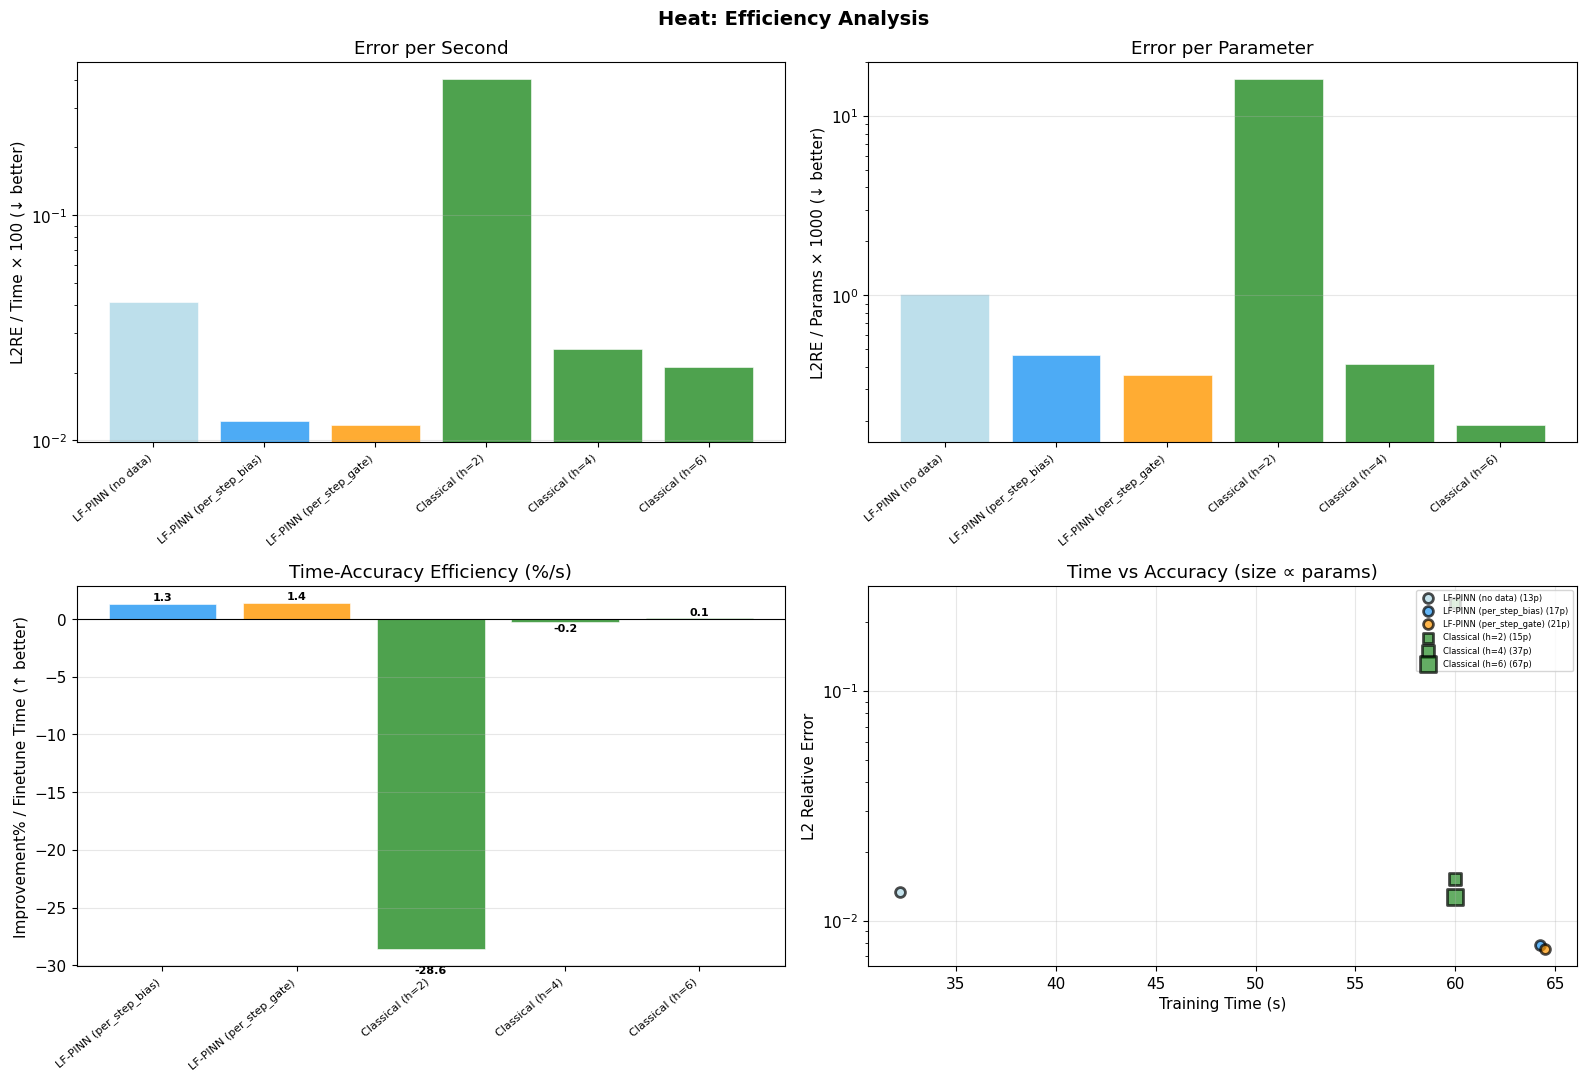

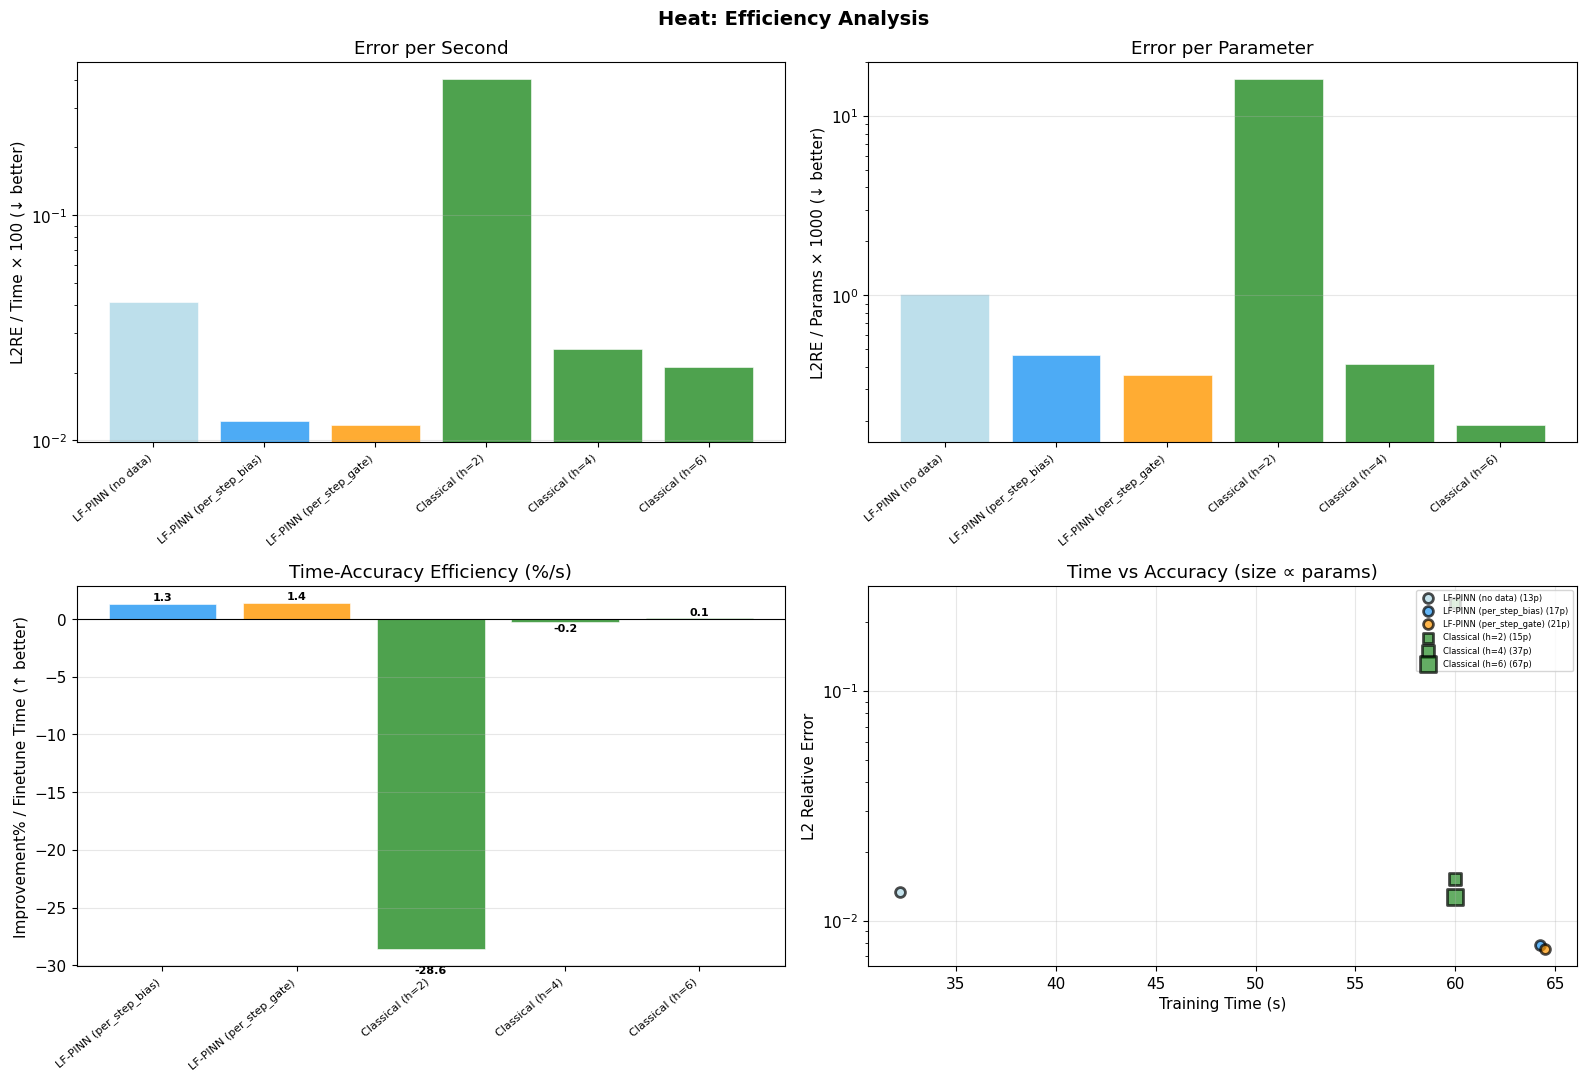

In [4]:
results, domain, title = run_model_comparison(
    pde_type='heat',
    n_runs=5,
    correction_modes=['per_step_bias', 'per_step_gate'],
    lf_pretrain_epochs=200,
    lf_finetune_epochs=1100,
    lf_finetune_lr=0.0005,
    classical_max_time=60,
    classical_epochs=1000000,
    verbose=True
)

plot_model_comparison(results, 'heat')
plot_efficiency_analysis(results, 'heat')

## Wave Equation


MODEL COMPARISON: Wave Equation
Runs: 5
LF-PINN: pretrain=150ep, finetune=400ep
Correction modes: ['rhs_scale', 'time_gate+rhs_scale']
Classical: 1000000ep, hidden_dims=[2, 4, 6]
Data: 50 points, noise=0.05


RUN 1/5 (seed=42)

  Training: LF-PINN (no data)...

Low-Fidelity PINN (Fixed-Point + Adaptive Steps)
PDE: wave | Max Steps: 3 | Params: 13
Iterations: 3 | LR: 0.001
Initial theta: 0.5

    ✓ L2RE=3.0185e-02, Time=91.9s

  Training: LF-PINN (rhs_scale)...

LF-PINN Theta Params
PDE: wave | Mode: rhs_scale
Steps: 3 | Iterations: 3
Base theta_net params: 13
Correction params: 3
Total trainable: 16

    Stage 1: PDE pretraining...
[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
    Pretrain done: 150 epochs, 100.6s
    Stage 2: Data finetuning (mode=rhs_scale)...
[ThetaParams] Corrections ENABLED (mode: rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
    Finetune done: 400 epochs, 30.4s
    ✓ L2RE=1.3209e-02, Time=131.

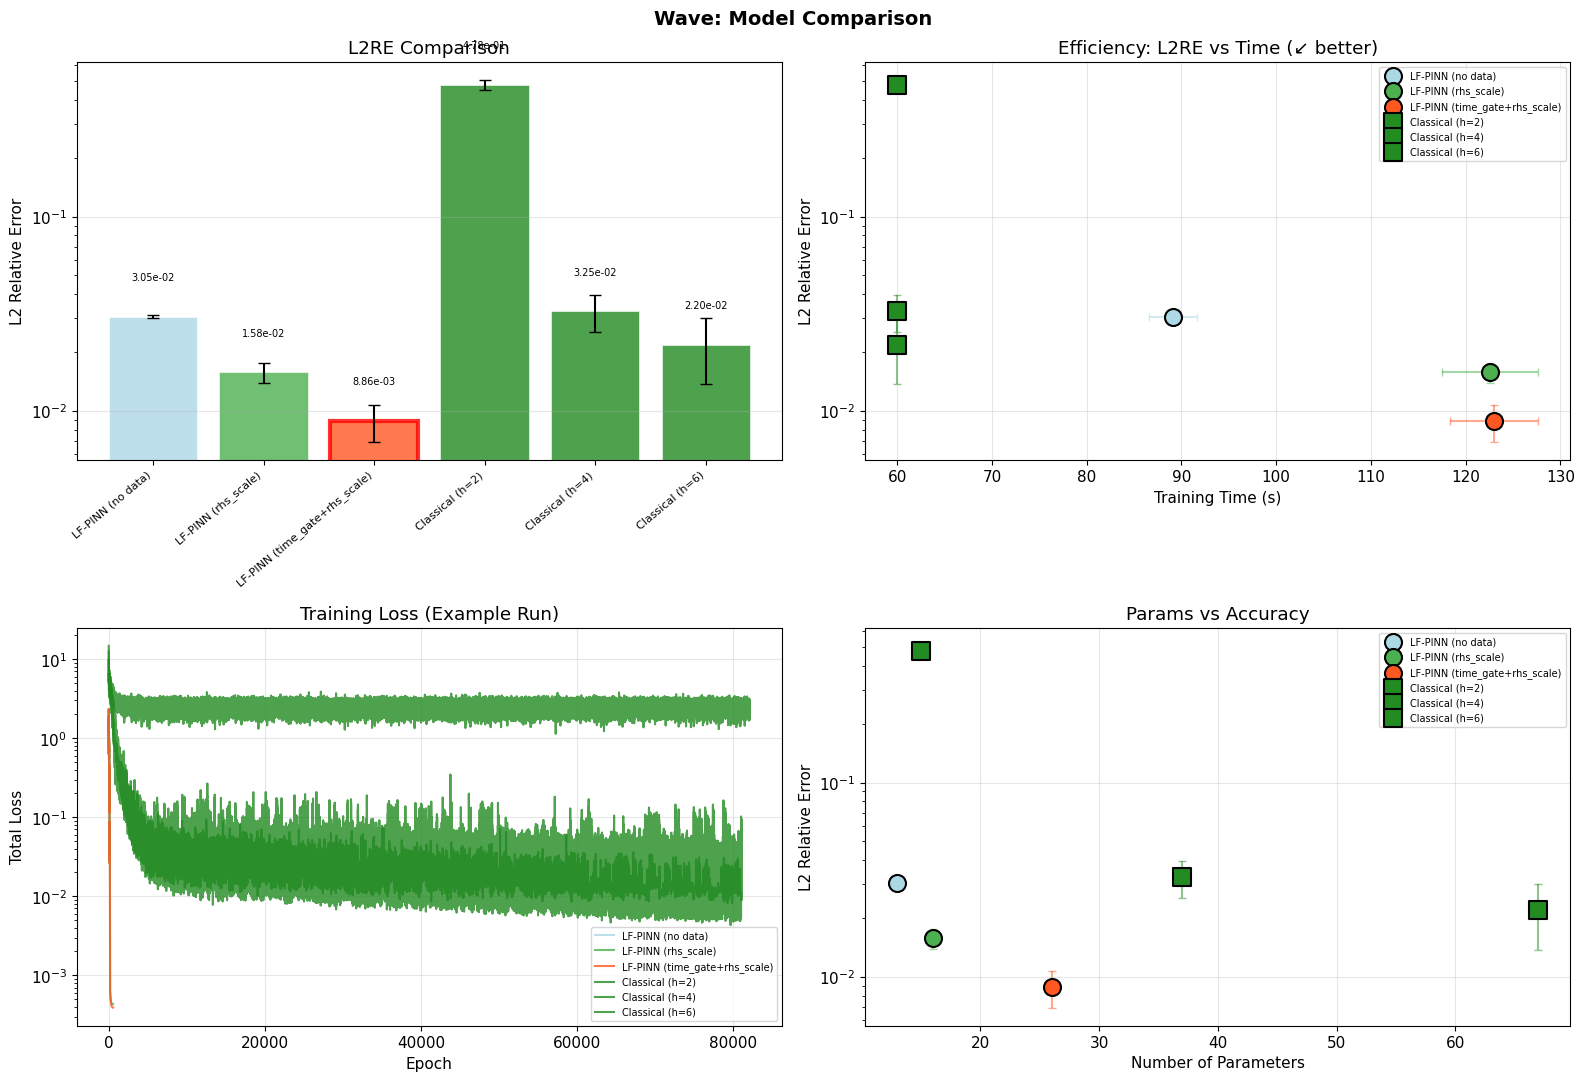

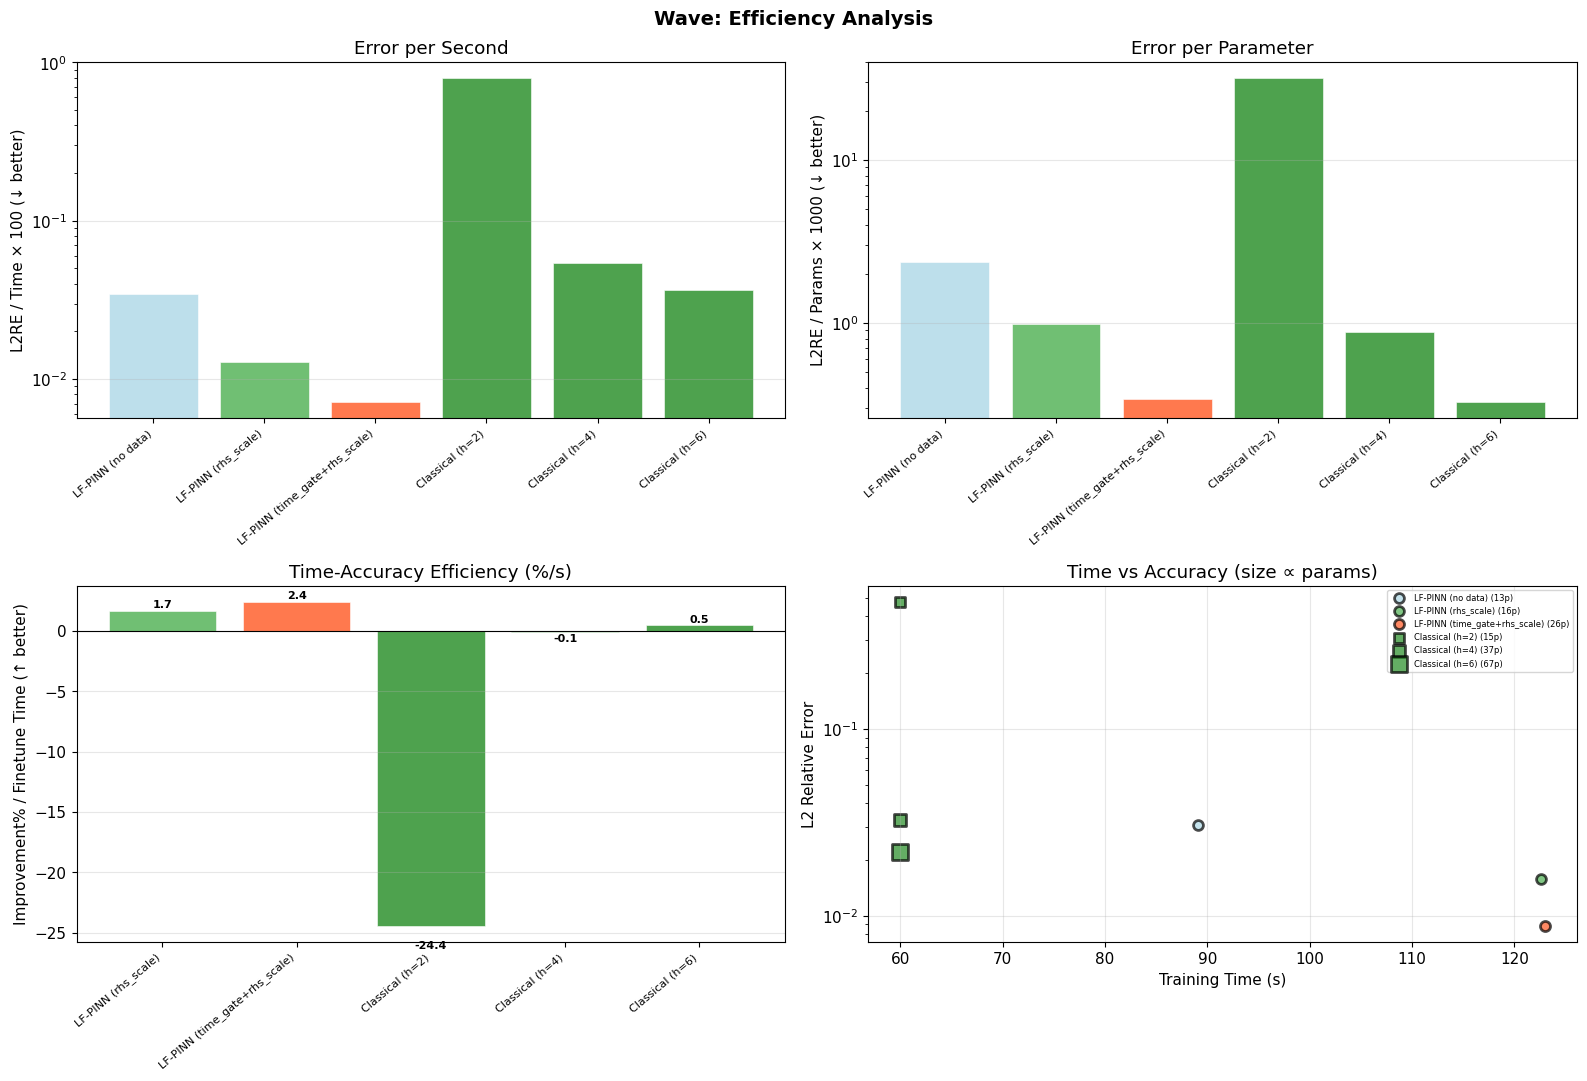

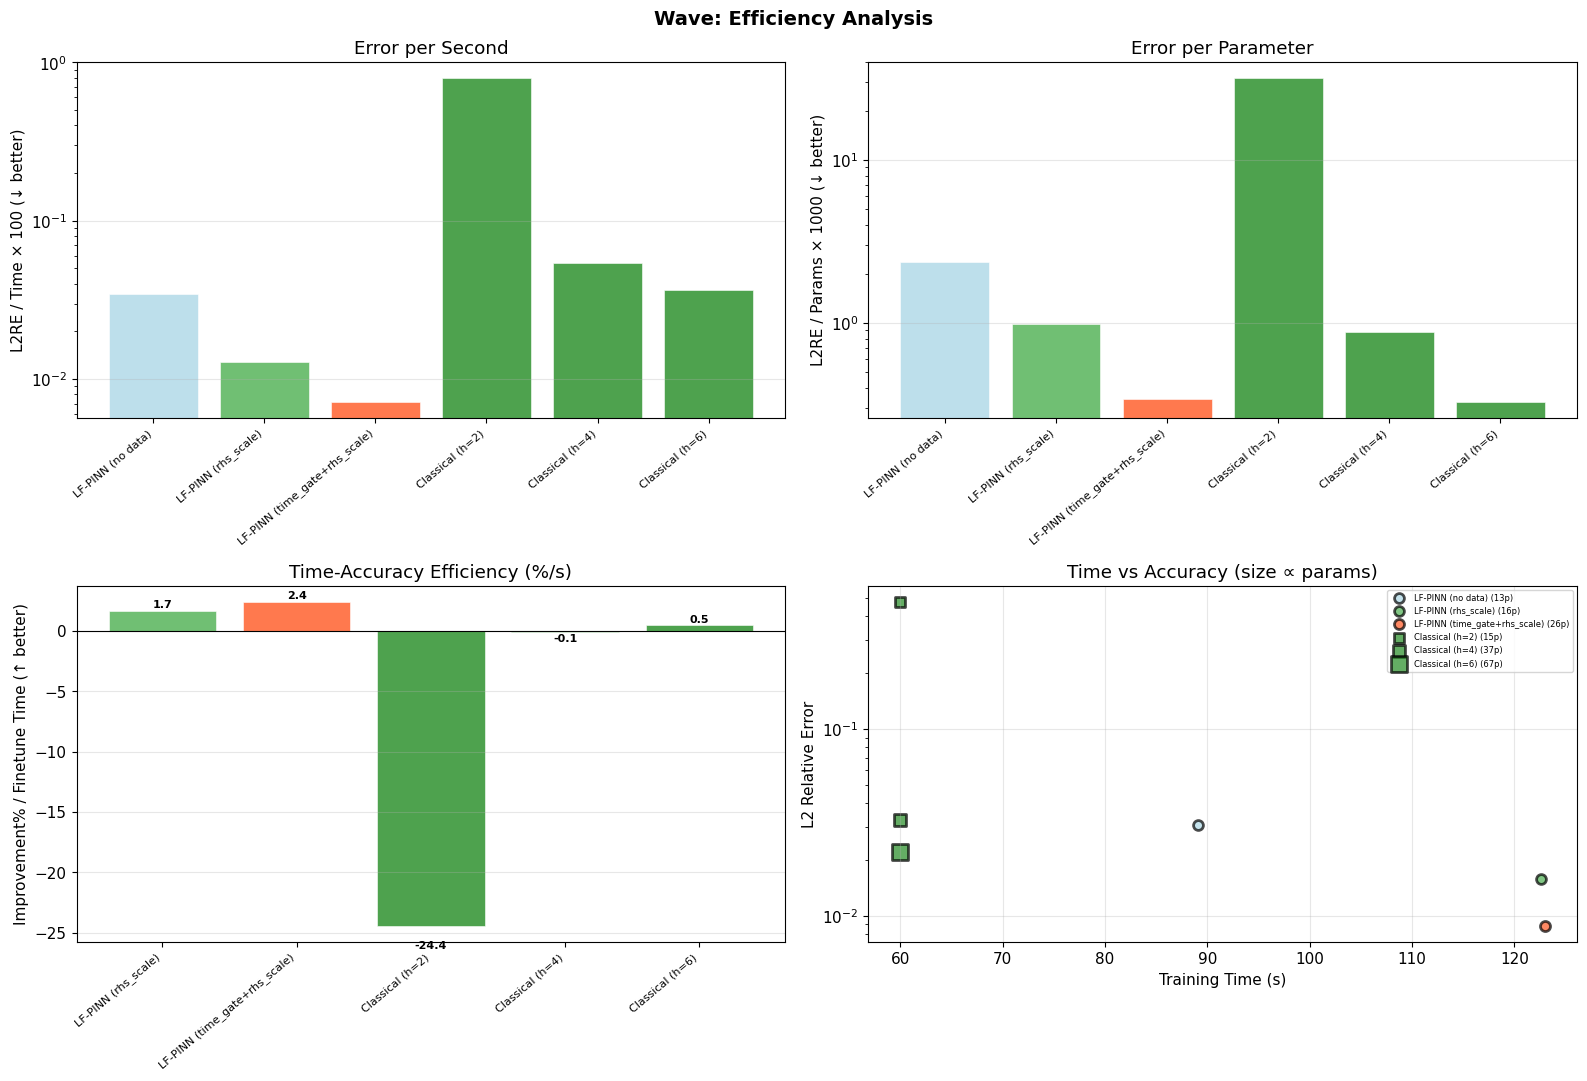

In [5]:
results, domain, title = run_model_comparison(
        pde_type='wave',
        n_runs=5,
        correction_modes=['rhs_scale', 'time_gate+rhs_scale'],
        lf_pretrain_epochs=150,
        lf_finetune_epochs=400,
        lf_finetune_lr=0.0001,
        classical_max_time=60,
        classical_epochs=1000000,
        verbose=True
    )
    
plot_model_comparison(results, 'wave')
plot_efficiency_analysis(results, 'wave')

## Burgers Equation


MODEL COMPARISON: Burgers Equation
Runs: 5
LF-PINN: pretrain=200ep, finetune=1400ep
Correction modes: ['rhs_scale']
Classical: 1000000ep, hidden_dims=[2, 4, 6]
Data: 50 points, noise=0.05


RUN 1/5 (seed=42)

  Training: LF-PINN (no data)...

Low-Fidelity PINN (Fixed-Point + Adaptive Steps)
PDE: burgers | Max Steps: 2 | Params: 13
Iterations: 2 | LR: 0.0005
Initial theta: 0.3



/Users/igor.velikorechanin/Desktop/Masters/Thesis/GitHub PINN 4/trapezoidal_LF_model/utils/pde_utils.py:448: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  phi_x, _ = quad(integrand_phi_x, limit_low, limit_high,


    ✓ L2RE=1.6313e-01, Time=74.7s

  Training: LF-PINN (rhs_scale)...

LF-PINN Theta Params
PDE: burgers | Mode: rhs_scale
Steps: 2 | Iterations: 2
Base theta_net params: 13
Correction params: 2
Total trainable: 15

    Stage 1: PDE pretraining...
[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
    Pretrain done: 200 epochs, 79.1s
    Stage 2: Data finetuning (mode=rhs_scale)...
[ThetaParams] Corrections ENABLED (mode: rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
    Finetune done: 1400 epochs, 48.4s
    ✓ L2RE=1.2164e-01, Time=127.5s

  Training: Classical (h=2)...
    Classical done: 102306 epochs, 60.0s
    ✓ L2RE=3.8822e-01, Params=15, Time=60.0s

  Training: Classical (h=4)...
    Classical done: 103616 epochs, 60.0s
    ✓ L2RE=5.3300e-02, Params=37, Time=60.0s

  Training: Classical (h=6)...
    Classical done: 101935 epochs, 60.0s
    ✓ L2RE=2.0886e-02, Params=67, Time=60.0s

RUN 2/5 (seed=153)

  Training: LF-

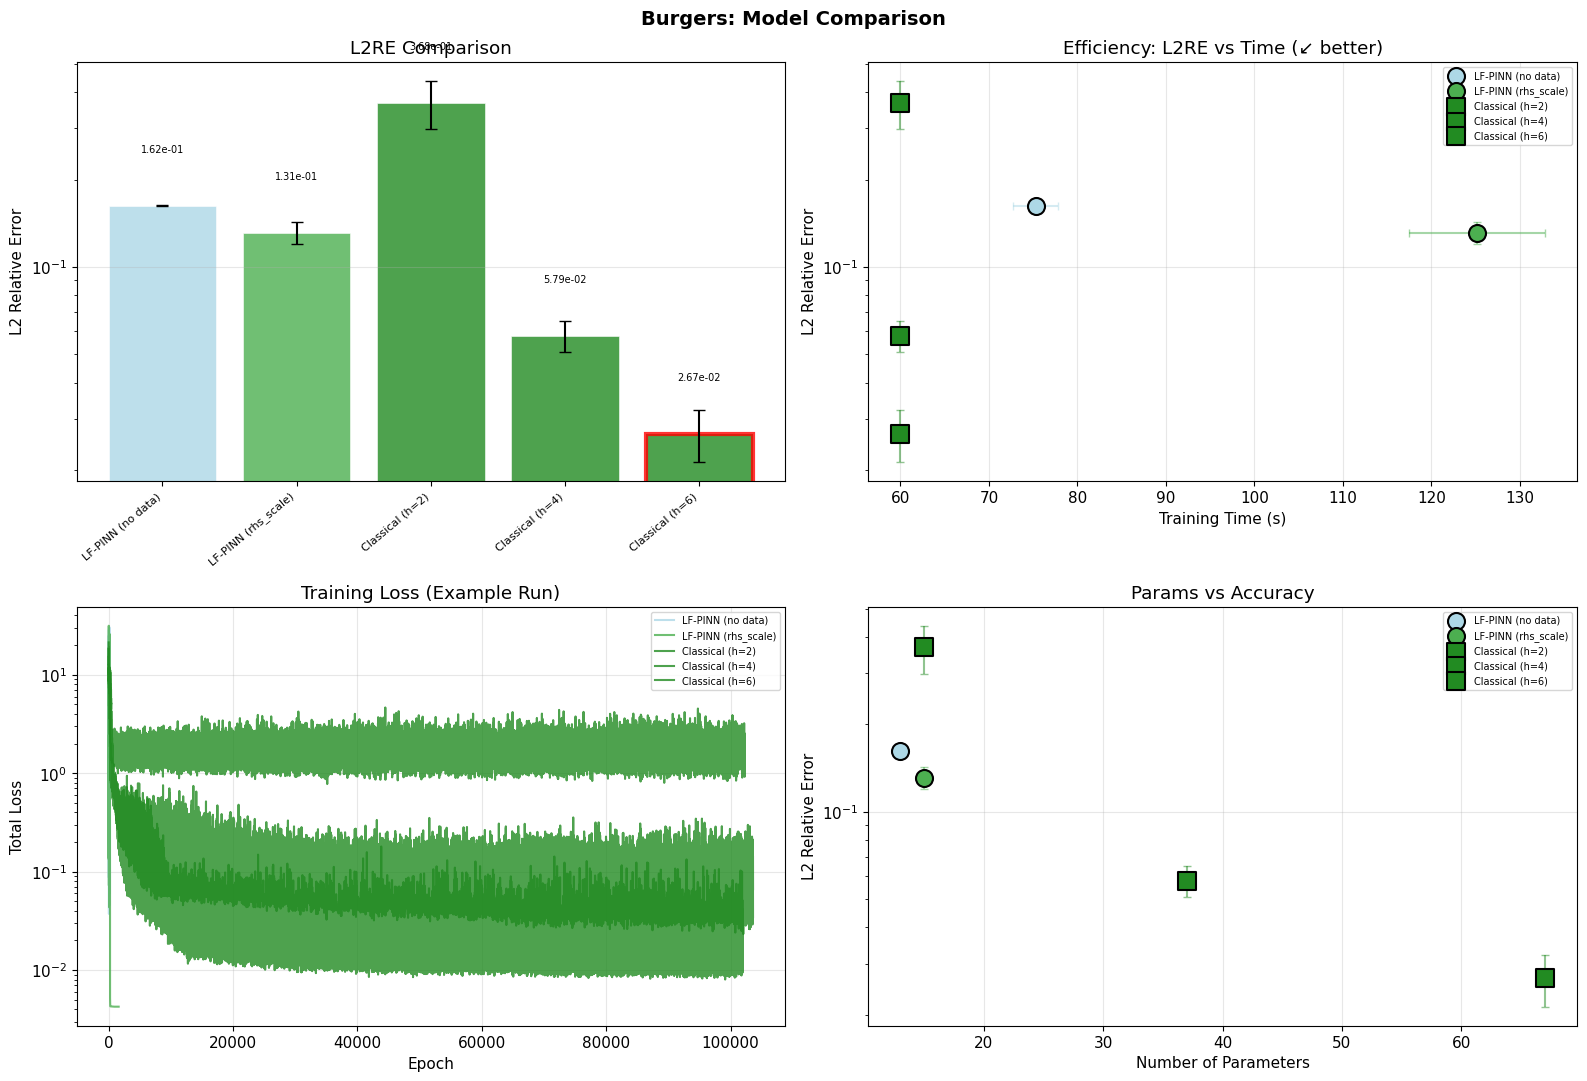

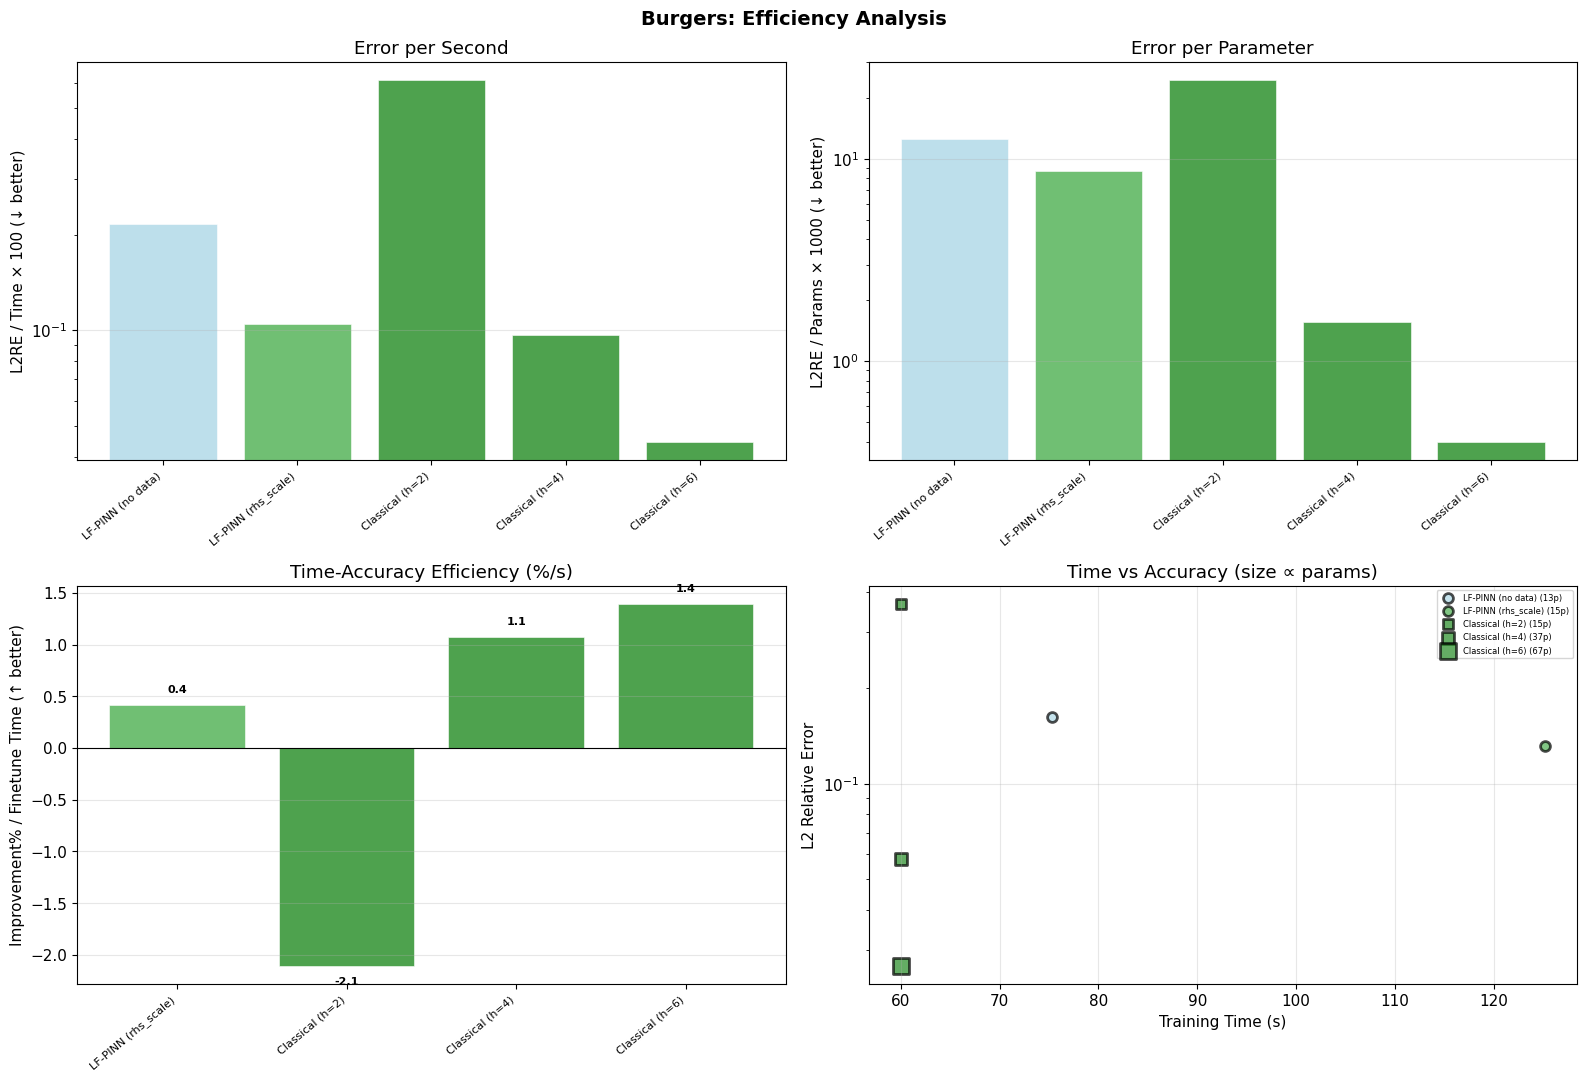

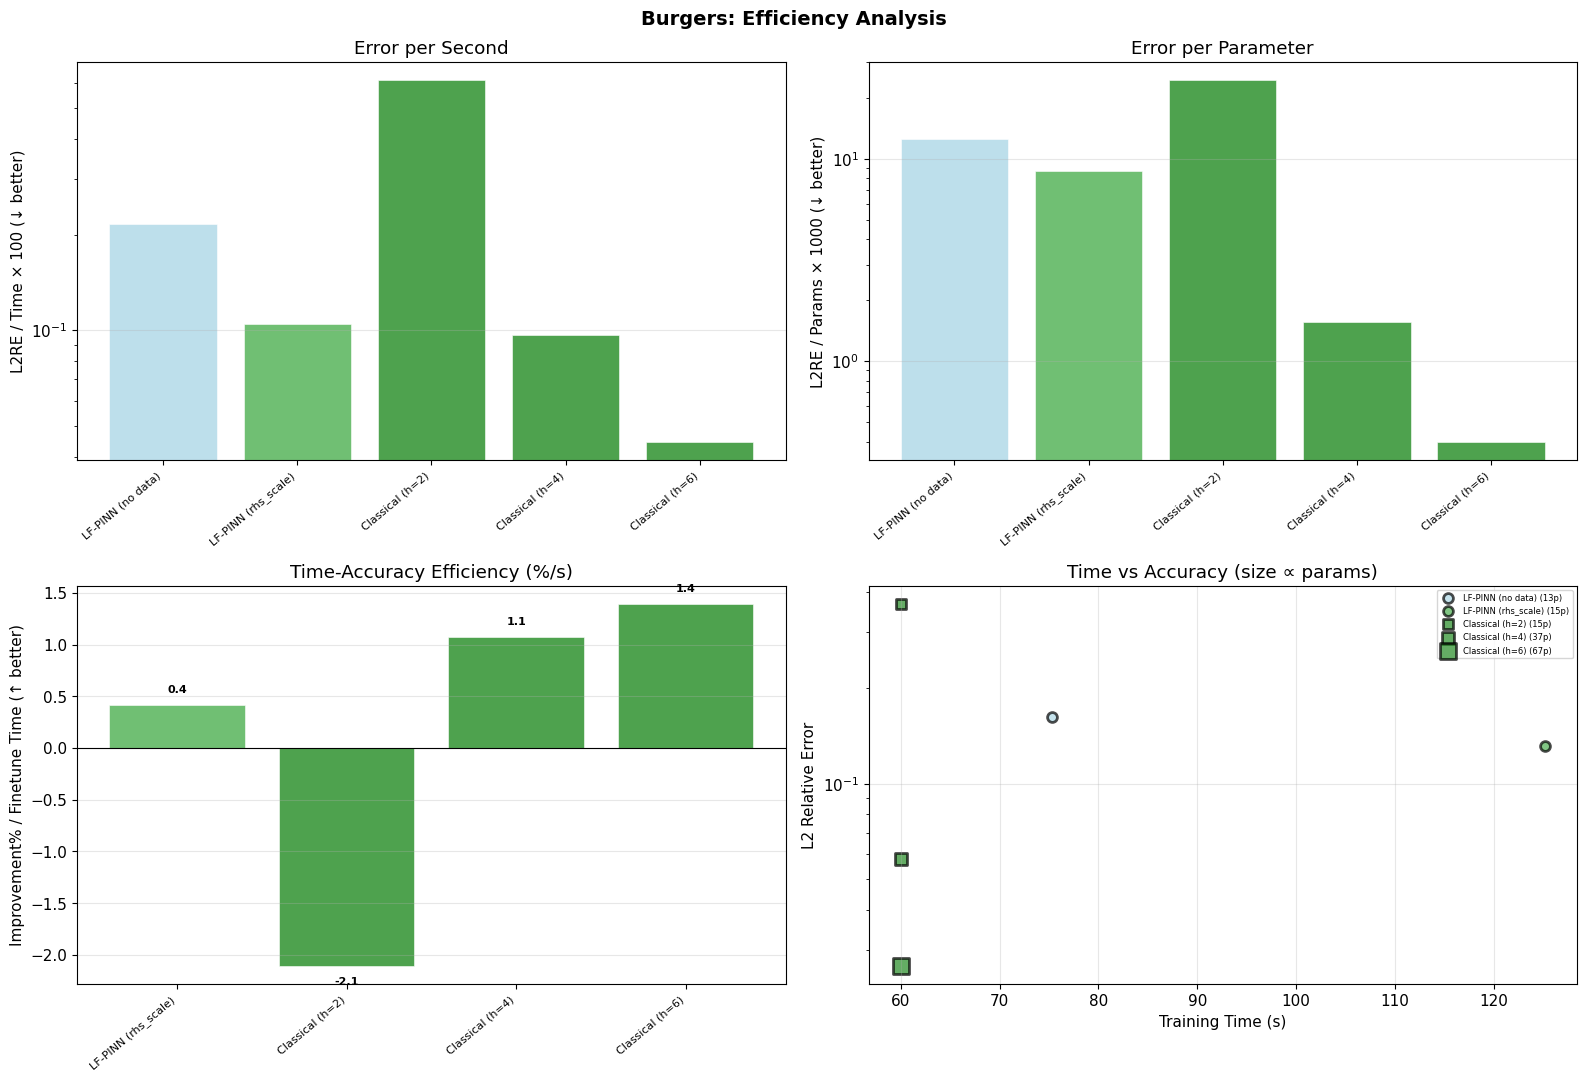

In [7]:
results, domain, title = run_model_comparison(
        pde_type='burgers',
        correction_modes=['rhs_scale'],
        n_runs=5,
        lf_pretrain_epochs=200,
        lf_finetune_epochs=1400,
        lf_finetune_lr =0.005,
        classical_max_time=60,
        classical_epochs=1000000,
        verbose=True
    )
    
plot_model_comparison(results, 'burgers')
plot_efficiency_analysis(results, 'burgers')

## Reaction-Diffusion Equation


MODEL COMPARISON: Reaction-Diffusion
Runs: 5
LF-PINN: pretrain=110ep, finetune=1000ep
Correction modes: ['output_bias']
Classical: 1000000ep, hidden_dims=[2, 4, 6]
Data: 50 points, noise=0.05


RUN 1/5 (seed=42)

  Training: LF-PINN (no data)...

Low-Fidelity PINN (Fixed-Point + Adaptive Steps)
PDE: reaction_diffusion | Max Steps: 2 | Params: 13
Iterations: 2 | LR: 0.005
Initial theta: 0.3

    ✓ L2RE=1.3583e-01, Time=52.7s

  Training: LF-PINN (output_bias)...

LF-PINN Theta Params
PDE: reaction_diffusion | Mode: output_bias
Steps: 2 | Iterations: 2
Base theta_net params: 13
Correction params: 2
Total trainable: 15

    Stage 1: PDE pretraining...
[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
    Pretrain done: 110 epochs, 55.4s
    Stage 2: Data finetuning (mode=output_bias)...
[ThetaParams] Corrections ENABLED (mode: output_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
    Finetune done: 1000 epochs, 37.7s
    ✓ L2RE=

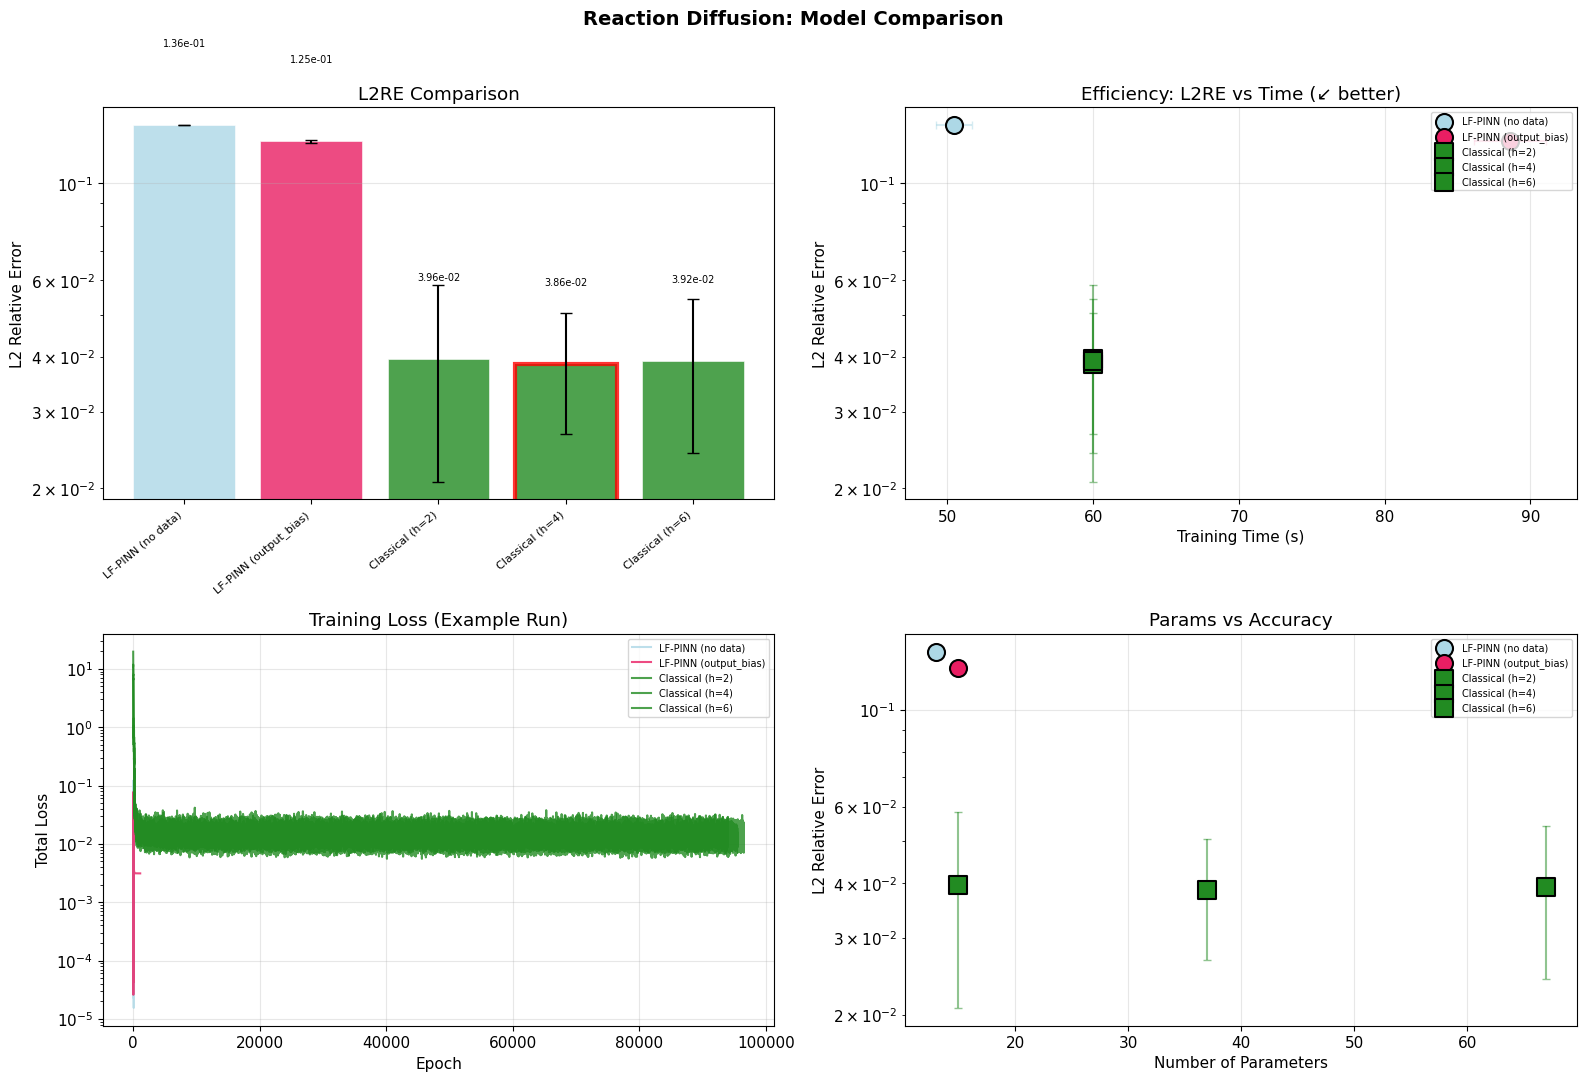

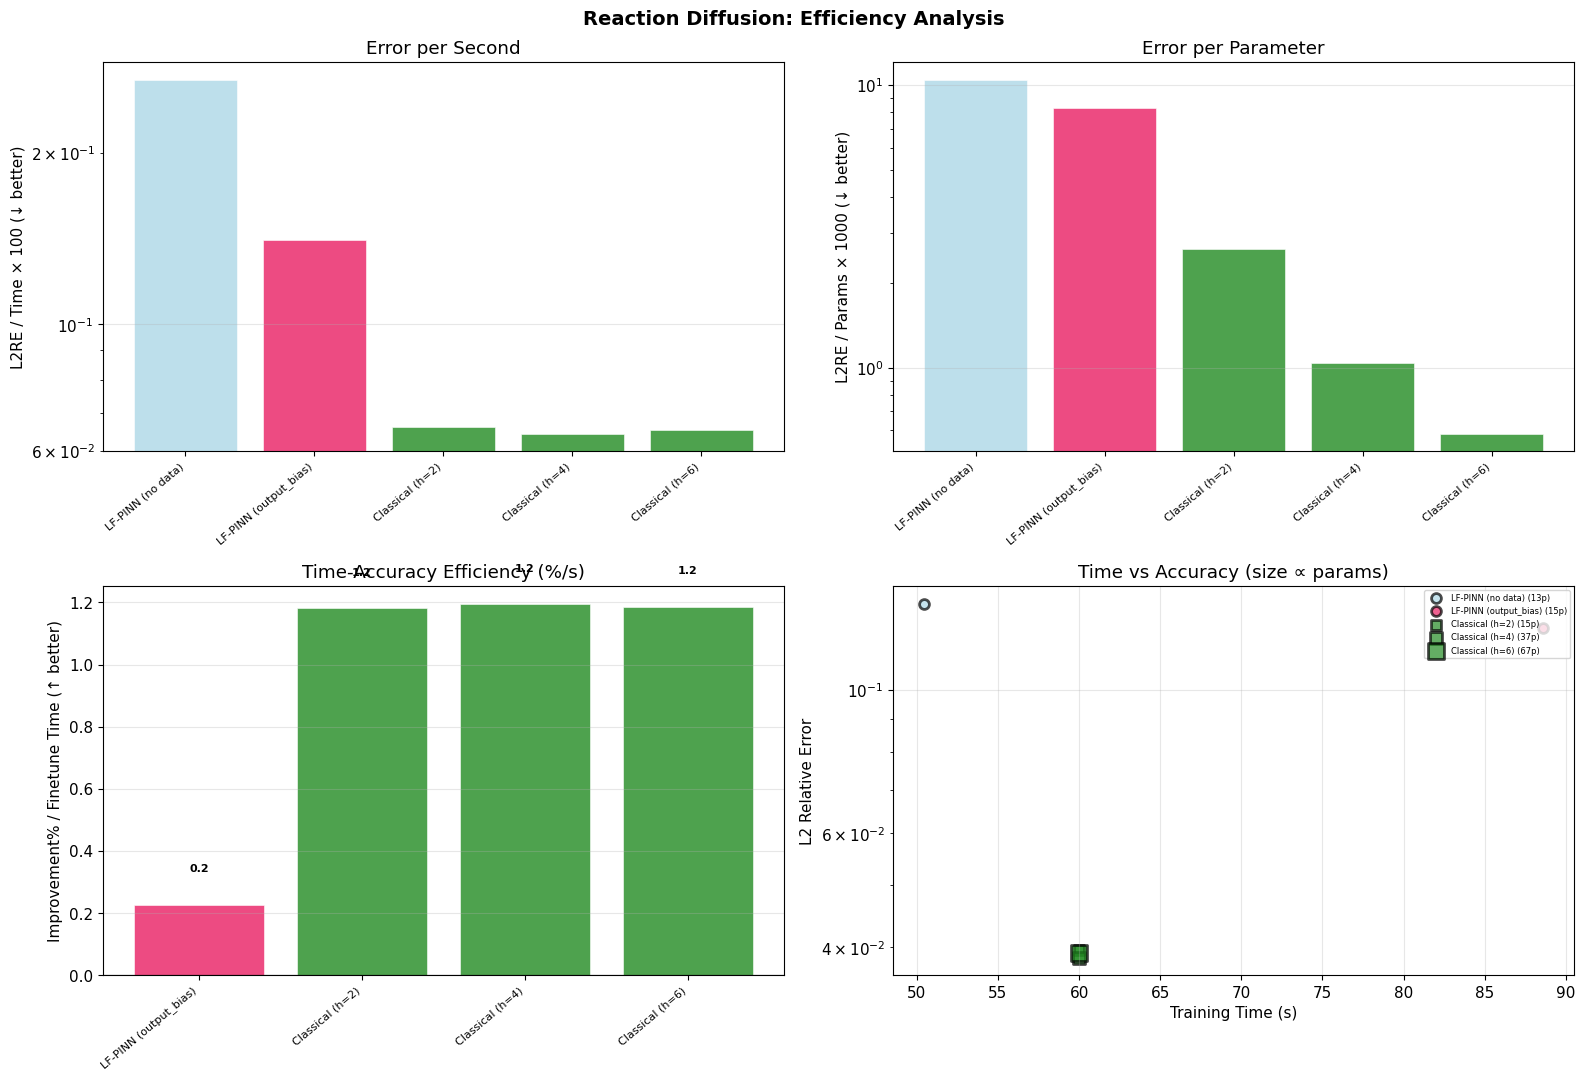

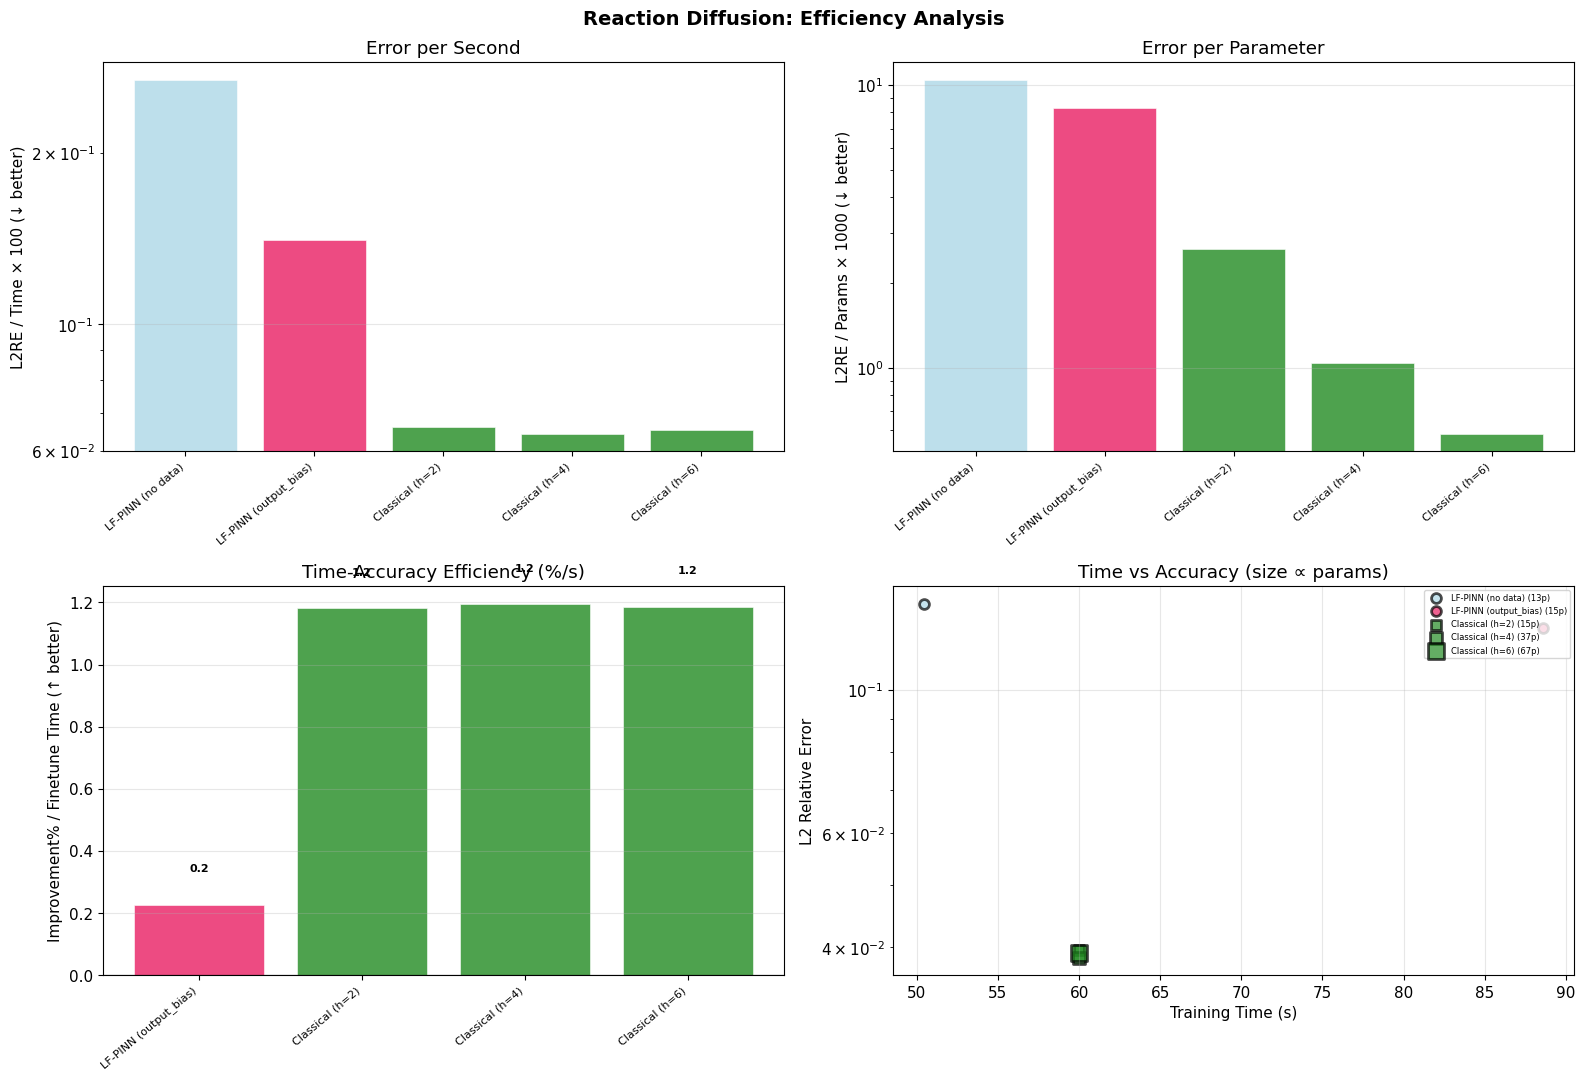

In [8]:
results, domain, title = run_model_comparison(
        pde_type='reaction_diffusion',
        n_runs=5,
        correction_modes=['output_bias'],
        lf_pretrain_epochs=110,
        lf_finetune_epochs=1000,
        lf_finetune_lr = 0.0001,
        classical_max_time=60,
        classical_epochs=1000000,
        verbose=True
    )
    
plot_model_comparison(results, 'reaction_diffusion')
plot_efficiency_analysis(results, 'reaction_diffusion')